#  Транзакции

$\large{В\: датасете\: {\color{Purple}{transaction\_data.csv}}\: содержатся\: следующие\: данные:}$

* <span style="color:green"><b>date</b></span> – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
* <span style="color:green"><b>name</b></span> – имя пользователя
* <span style="color:green"><b>transaction</b></span> – статус транзакции
* <span style="color:green"><b>minute*</b></span> – сколько минут прошло с начала дня

## Задачи

1. Загрузить датасет transaction_data.csv. Проверить размер таблицы, типы переменных, число пропущенных значений и описательную статистику
2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализировать результат с помощью барплота
3. Сколько транзакций завершились ошибкой?
4. Сколько успешных транзакций осуществил каждый из пользователей? Построить гистограмму распределения числа успешных транзакций
5. Коллега прислал Вам обновленные данные. Необходимо построить сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполнить нулями
6. Изучить представленный график. Помочь коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
7. Если в данные есть ошибка, исправить её и сохранить правильное число минут, прошедших с начала дня, в колонку true_minute.

In [79]:
# Импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [80]:
# Задаем настройки

from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 8)
sns.set_theme(style="darkgrid")

## 1. Загрузить датасет transaction_data.csv. Проверить размер таблицы, типы переменных, число пропущенных значений и описательную статистику

In [81]:
# Загружаем датасет

transaction_df = pd.read_csv('transaction_data.csv')
transaction_df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [82]:
# Размер таблицы

transaction_df.shape

(5315, 3)

In [83]:
# Типы переменных

transaction_df.dtypes

date           object
name           object
transaction    object
dtype: object

In [84]:
# Число пропущенных значений

transaction_df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [85]:
# Описательная статистика

transaction_df.describe(include='all')

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


## 2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализировать результат с помощью барплота.

In [86]:
# Сгруппируем значения по колонке transaction

data_transaction = transaction_df.groupby('transaction') \
                                 .agg({'transaction' : 'count'}) \
                                 .rename(columns={'transaction': 'count_transaction'}) \
                                 .reset_index() \
                                 .rename(columns={'transaction': 'transaction_status'})
data_transaction

,transaction_status,count_transaction
0,cancelled,1619
1,error,4
2,successfull,3692


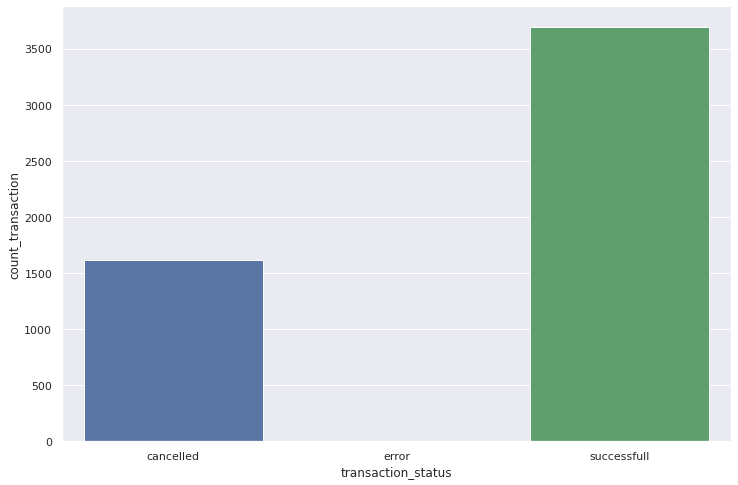

In [87]:
# Как можно улучшить график?

sns.barplot(data=data_transaction, x='transaction_status', y='count_transaction')
plt.show()

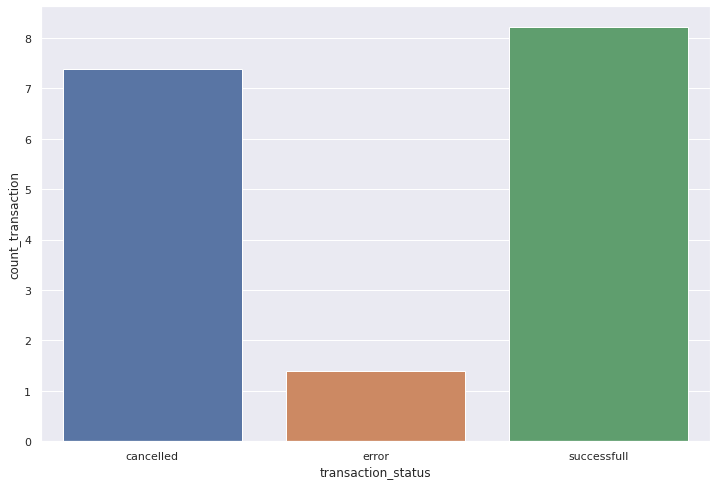

In [88]:
sns.barplot(data=data_transaction, x='transaction_status', y=np.log(data_transaction['count_transaction']))
plt.show()

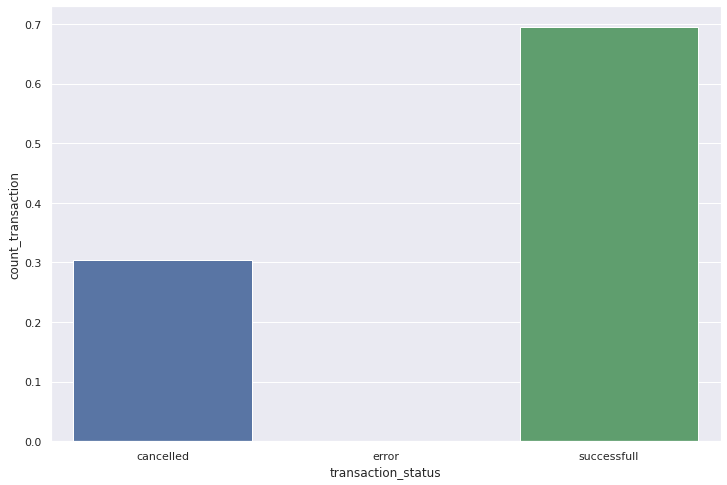

In [89]:
percent_transaction = data_transaction.count_transaction / data_transaction.count_transaction.sum()

sns.barplot(data=data_transaction, x='transaction_status', y=percent_transaction)
plt.show()

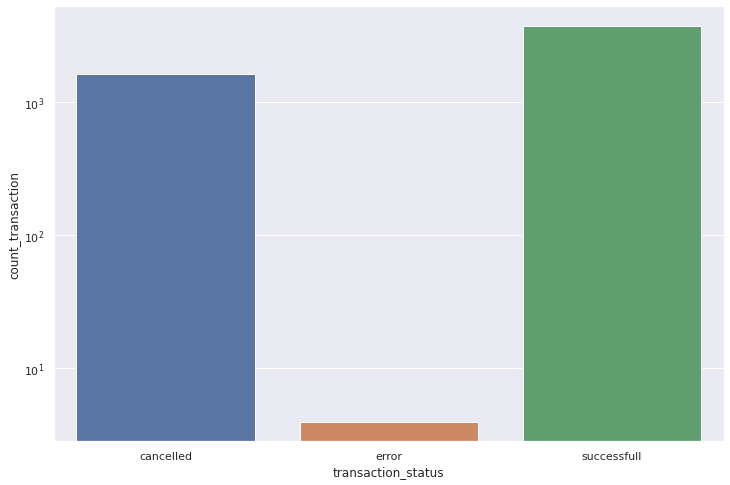

In [90]:
sns.barplot(data=data_transaction,
            x='transaction_status',
            y=data_transaction['count_transaction']).set_yscale('log')
plt.show()

## 3. Сколько транзакций завершились ошибкой?

In [91]:
# Из графика видно, что 4 транзакции завершились ошибкой

## 4. Сколько успешных транзакций осуществил каждый из пользователей?

In [92]:
# Построить гистограмму распределения числа успешных транзакций

successfull_transactions = transaction_df.query('transaction == "successfull"') \
                                         .groupby('name') \
                                         .agg({'transaction': 'count'}) \
                                         .reset_index() \
                                         .rename(columns={'transaction': 'transaction_sum'})

successfull_transactions.describe(include='all')

,name,transaction_sum
count,56,56.000000
unique,56,NaN
top,Irina_Ivanova,NaN
freq,1,NaN
mean,NaN,65.928571
std,NaN,7.787769
min,NaN,46.000000
25%,NaN,61.000000
50%,NaN,64.000000
75%,NaN,72.000000


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


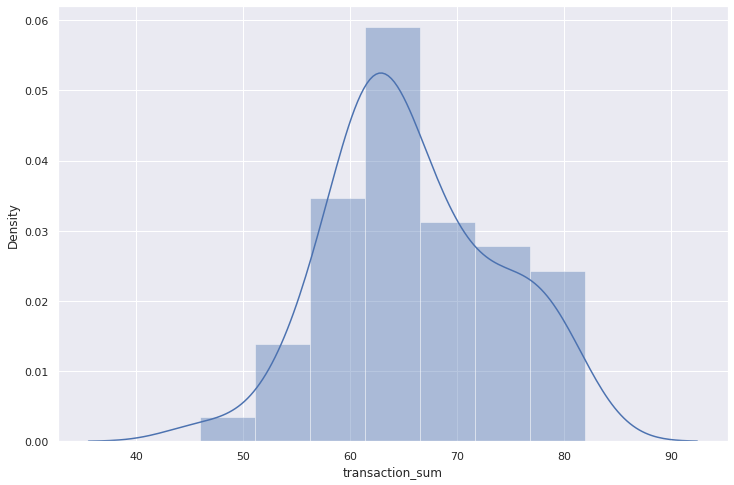

In [93]:
# Посмотрим на характеристики распределения,
# а затем построим гистограмму числа успешных транзакций,
# совершённых каждым пользователем, где
# по оси x – число транзакций;
# по оси y – доля пользователей с таким числом транзакций

sns.distplot(successfull_transactions.transaction_sum)

## 5. Коллега прислал Вам обновленные данные. Необходимо построить сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполнить нулями

In [94]:
# Считаем новый датафрейм

transaction_data_updated = pd.read_csv('transaction_data_updated.csv')
transaction_data_updated.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [99]:
# Посчитаем кол-вл транзакций в минуту для каждого пользователя

pivot_df = transaction_data_updated.groupby(['name', 'minute'], as_index=False) \
                                   .agg({'transaction': 'count'})

pivot_df.head()

,name,minute,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [96]:
# Построим таблицу

user_vs_minute_pivot = pivot_df.pivot(index='minute',
                                      columns='name',
                                      values='transaction')

In [97]:
# Заполниним пропущенные значения нулями

user_vs_minute_pivot = user_vs_minute_pivot.fillna(0)

user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


## 6. Изучить представленный график

In [109]:
# Помочь коллеге разобраться, есть ли в данных ошибка, или же всё хорошо
# Для этого построим график:
# по оси x – минута транзакции (сколько минут прошло с начала дня);
# по оси y – число транзакций

data_grapth = transaction_data_updated.groupby('minute') \
                                      .agg({'transaction': 'count'}) \
                                      .rename(columns={'transaction': 'transaction_count'}) \
                                      .sort_values('transaction_count', ascending=False) \
                                      .reset_index()

data_grapth.head()

,minute,transaction_count
0,14,150
1,1,145
2,12,140
3,27,132
4,3,129


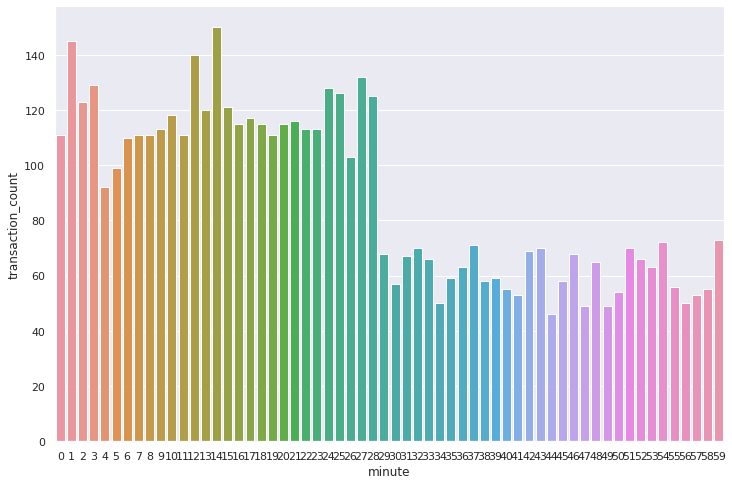

In [111]:
# Строим график

sns.barplot(data=data_grapth, x='minute', y='transaction_count')

# Сам график построен правильно, однако ошибка в данных
# В столбец minute извлекли минутную часть времени, а не число минут с начала дня

## 7. Если в данные есть ошибка, исправить её и сохранить правильное число минут, прошедших с начала дня, в колонку true_minute.

In [117]:
# В колонке data в тип данных object

transaction_data_updated.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [120]:
# Переведем колонку data в тип данных "дата"

transaction_data_updated['date'] = pd.to_datetime(transaction_data_updated['date'])

In [125]:
# Переведем часы в минуты и сложим с минутами

transaction_data_updated['true_minute'] = transaction_data_updated.date.dt.hour * 60 \
                                        + transaction_data_updated.date.dt.minute

In [126]:
transaction_data_updated.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [127]:
# Подготовим данные для нового графика

data_grapth_true = transaction_data_updated.groupby('true_minute') \
                                      .agg({'transaction': 'count'}) \
                                      .rename(columns={'transaction': 'transaction_count'}) \
                                      .sort_values('transaction_count', ascending=False) \
                                      .reset_index()

data_grapth_true.head()

,true_minute,transaction_count
0,14,80
1,1,77
2,72,75
3,59,73
4,27,73


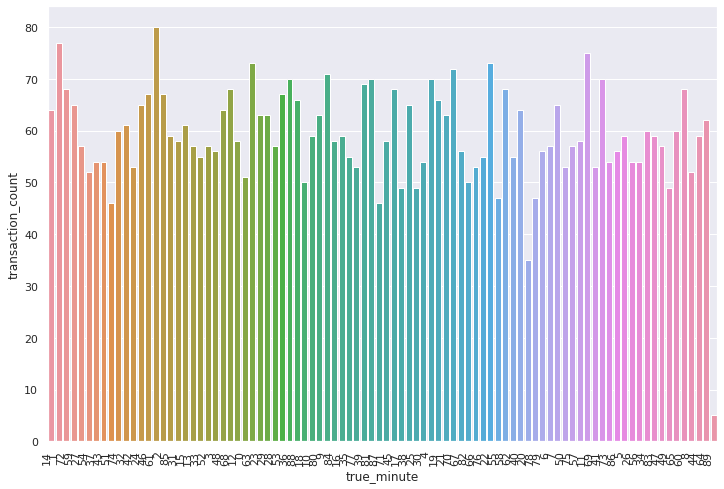

In [133]:
# Построим график

# sns.barplot(data=data_grapth_true, x='true_minute', y='transaction_count')

fig, ax = plt.subplots()    
fig = sns.barplot(x='true_minute',
                  y='transaction_count',
                  data=data_grapth_true, 
                  estimator=sum,
                  ci=None,
                  ax=ax)

ax = ax.set_xticklabels(labels=data_grapth_true.true_minute ,rotation=90, ha='right')